In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import argparse

%matplotlib inline

In [2]:
import cv2
import os

In [3]:
folder_path = "imgs"

In [4]:
image_paths = []

for filename in os.listdir(folder_path):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path) 

In [5]:
output_folder = "output_images"
os.makedirs(output_folder, exist_ok=True)

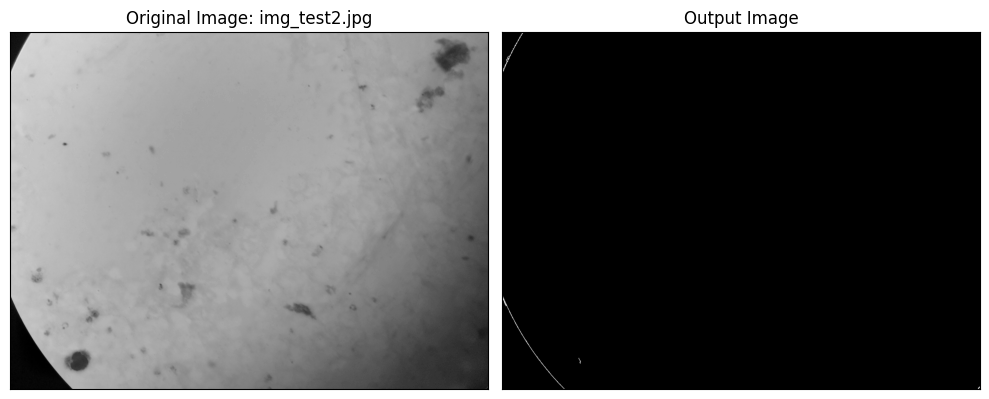

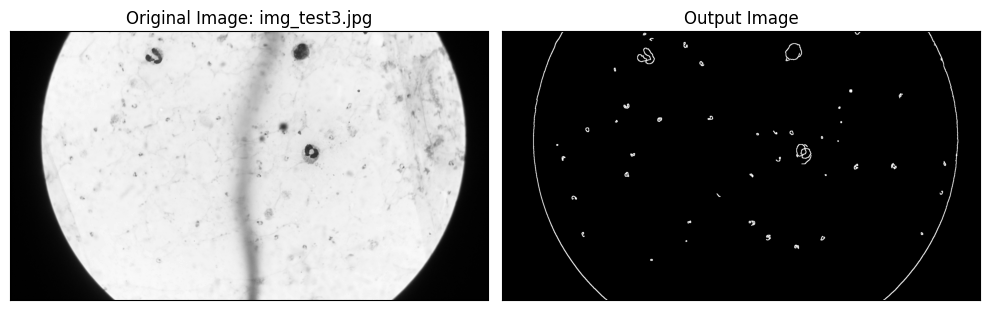

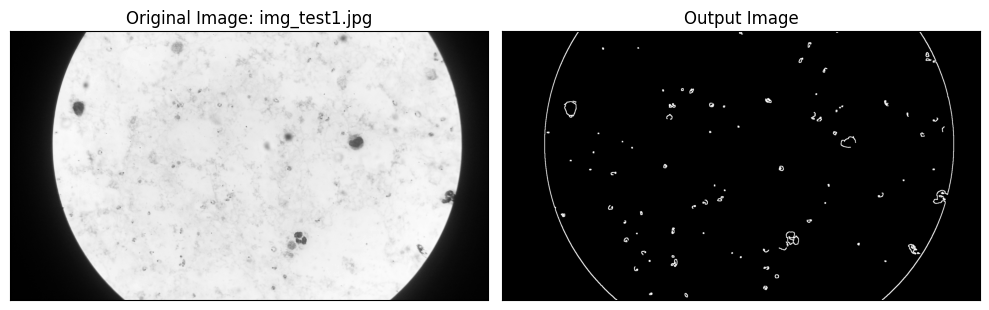

In [6]:
for image_path in image_paths:
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

    edges = cv2.Canny(blurred_img, 50, 150) 

    dilated_edges = cv2.dilate(edges, None, iterations=1)

    output_image_path = os.path.join(output_folder, os.path.basename(image_path))
    cv2.imwrite(output_image_path, dilated_edges)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Original Image: {os.path.basename(image_path)}')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.imshow(dilated_edges, cmap='gray')
    plt.title('Output Image')
    plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()